In [1]:
import sys
sys.path.append('/Users/daiyiluo/Documents/ELEC599')
import numpy as np
import matplotlib.pyplot as plt
import CalHMM
import warnings
warnings.filterwarnings('ignore')
import HMMCrossValid as hcv

In [2]:
import imp

In [77]:
imp.reload(hcv)

<module 'HMMCrossValid' from '/Users/daiyiluo/Documents/ELEC599/HMMCrossValid.py'>

In [78]:
folder = '/Users/daiyiluo/Downloads/KQ086_210110' #KQ095_210205' #
timebin = 500
name = 'Spike'
n_chunks = 3
k = 2
d = hcv.datainfo(folder, timebin, name, n_chunks, k)

In [81]:
%matplotlib

Using matplotlib backend: MacOSX


In [84]:
for i in range(d.Trace0.shape[1]):
    plt.plot(d.Trace0[:,i]/np.max(d.Trace0[:,i])+i)

In [85]:
plt.xlabel('time')
plt.ylabel('neuron')
plt.title('Calcium Traces')

Text(0.5, 1.0, 'Calcium Traces')

Train chunk: 0


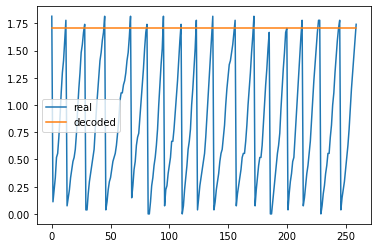

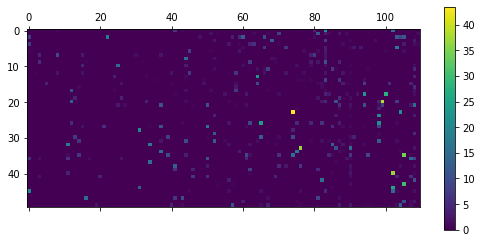

Test set: chunk 0 set 1


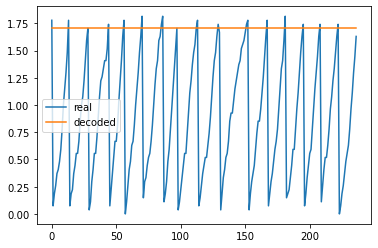

Test set: chunk 1 set 0


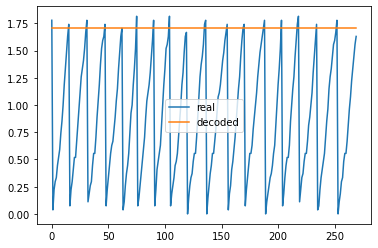

Test set: chunk 1 set 1


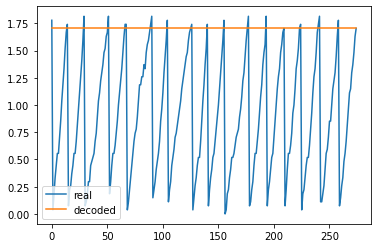

Test set: chunk 2 set 0


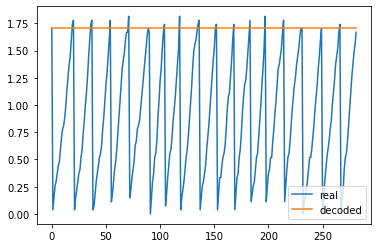

Test set: chunk 2 set 1


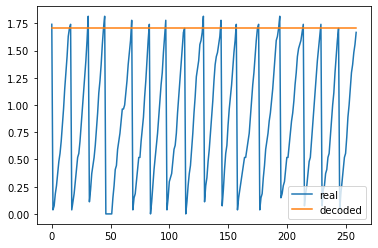

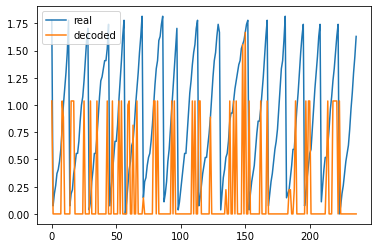

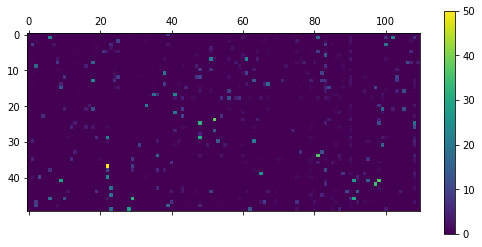

Test set: chunk 0 set 0


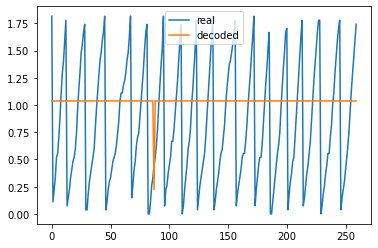

Test set: chunk 1 set 0


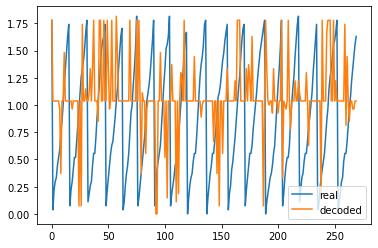

Test set: chunk 1 set 1


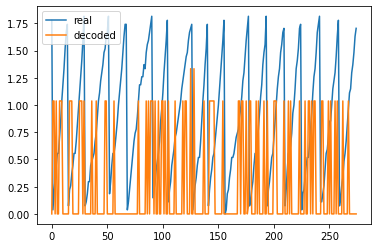

Test set: chunk 2 set 0


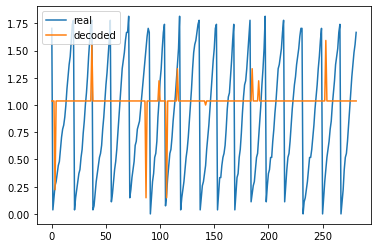

Test set: chunk 2 set 1


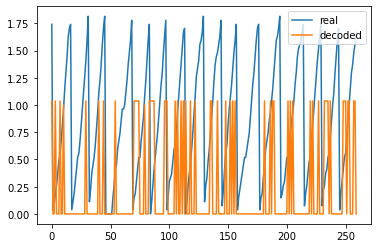

Train chunk: 1


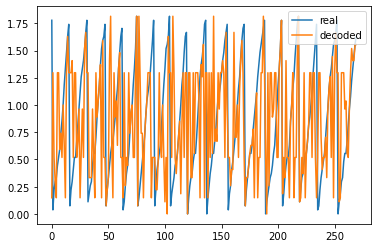

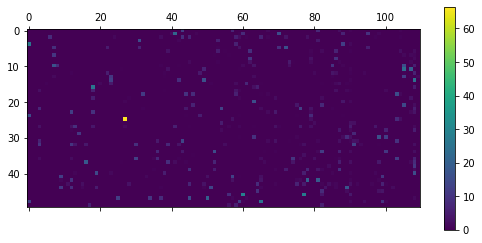

Test set: chunk 1 set 1


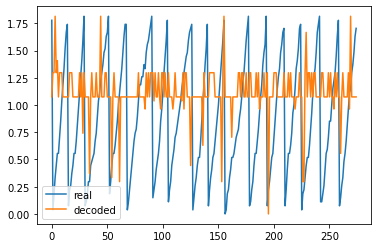

Test set: chunk 0 set 0


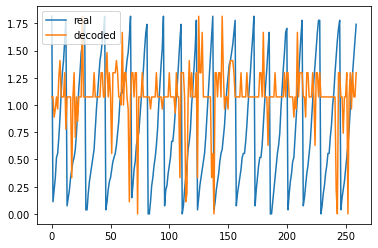

Test set: chunk 0 set 1


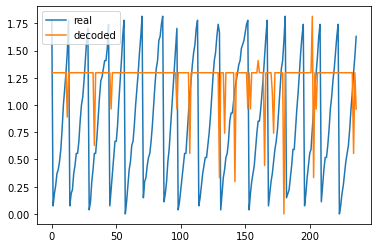

Test set: chunk 2 set 0


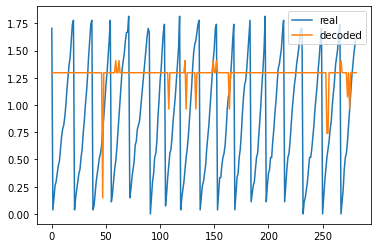

Test set: chunk 2 set 1


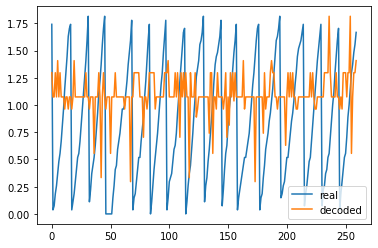

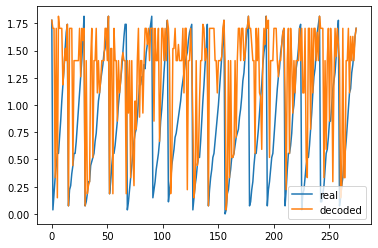

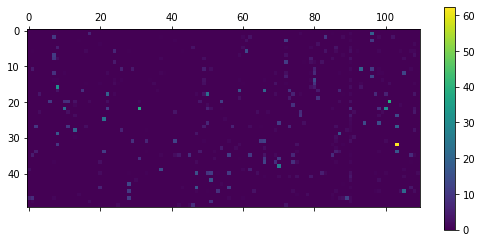

Test set: chunk 1 set 0


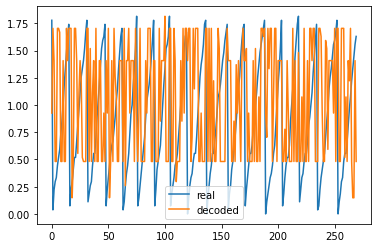

Test set: chunk 0 set 0


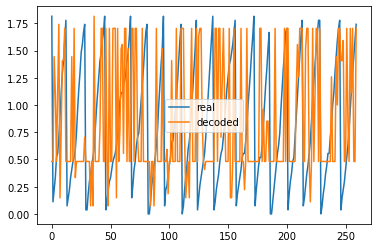

Test set: chunk 0 set 1


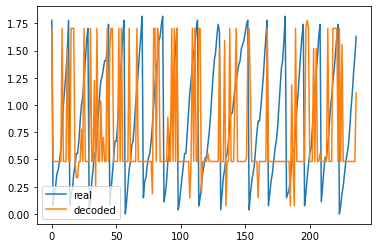

Test set: chunk 2 set 0


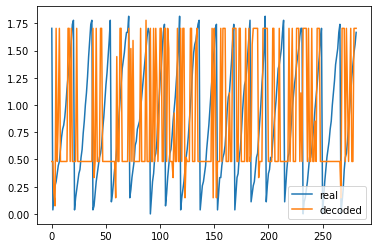

Test set: chunk 2 set 1


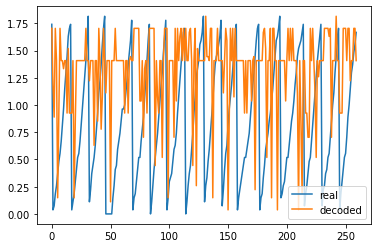

Train chunk: 2


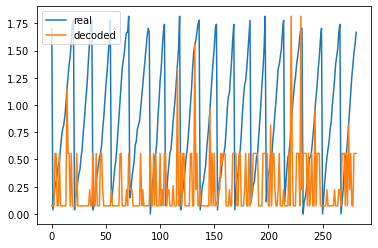

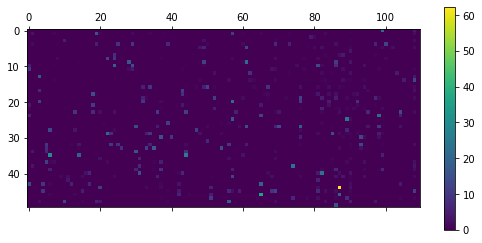

Test set: chunk 2 set 1


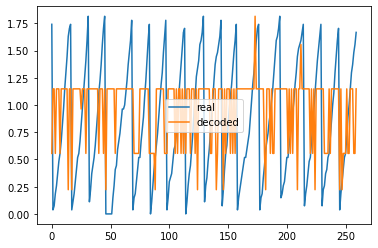

Test set: chunk 0 set 0


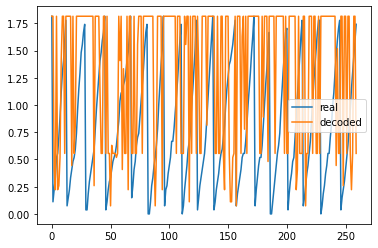

Test set: chunk 0 set 1


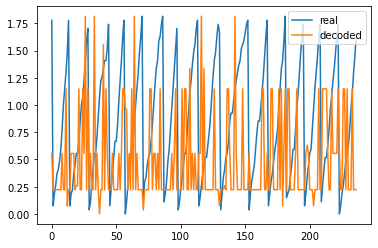

Test set: chunk 1 set 0


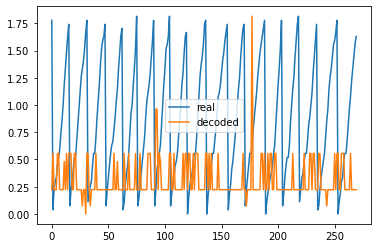

Test set: chunk 1 set 1


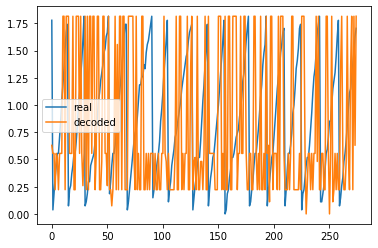

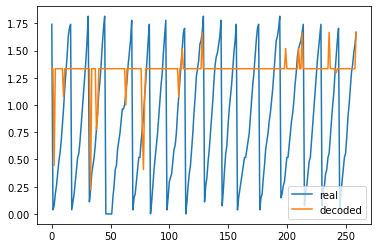

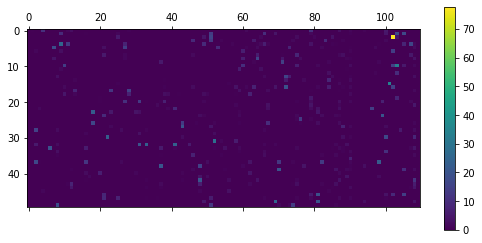

Test set: chunk 2 set 0


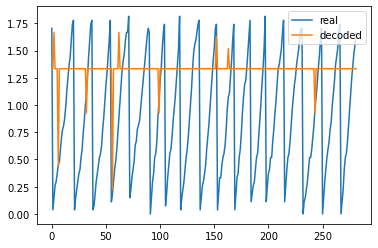

Test set: chunk 0 set 0


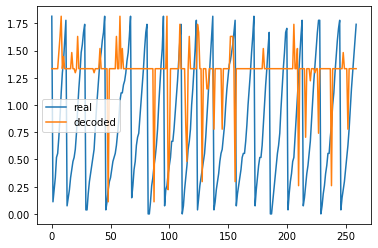

Test set: chunk 0 set 1


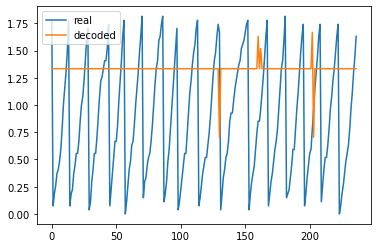

Test set: chunk 1 set 0


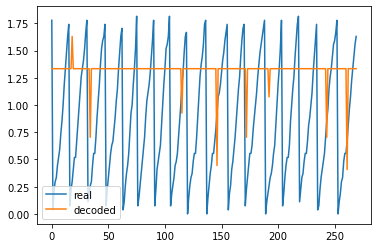

Test set: chunk 1 set 1


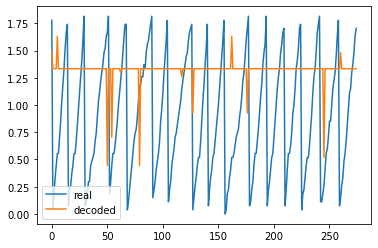

============= 1 =============


In [79]:
d.GaussianSetCrossValid(text=True,plot=True)

In [83]:
d.logprob_test

[[[74.92423827672862, -12.222746257240953],
  [75.05757080752267,
   75.17748293593066,
   -86.01199306162655,
   -18.976757081905088],
  [75.0761967483084,
   75.10249701367007,
   -27.909032944821714,
   -19.853754727211776]],
 [[-55.00376053512968,
   -44.68319957264714,
   -54.57566227527164,
   -37.4956180095229],
  [-28.691051391744214, -58.86226349118927],
  [-21.97092982713758,
   -30.198557115014424,
   -33.93749649797626,
   -57.23038728906794]],
 [[-35.5649944646402,
   -24.769295690717026,
   -56.86209824144834,
   -17.708389735803088],
  [-20.658726725545563,
   -29.569673770876015,
   -16.828600968246725,
   -21.806569119514858],
  [-16.14701636943215, -17.514084906520463]]]

In [60]:
i_iter=0
while i_iter<19:
    try:
        d.GaussianSetCrossValid(text=False)
        i_iter+=1
    except:
        print('failed')
        pass

Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 4 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 5 =============
Train chunk: 0
failed
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 6 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 7 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 8 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 9 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 10 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 11 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 12 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 13 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 14 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 15 =============
Train chunk: 0
Train chunk: 1
Train chunk: 2
============= 16 ==========

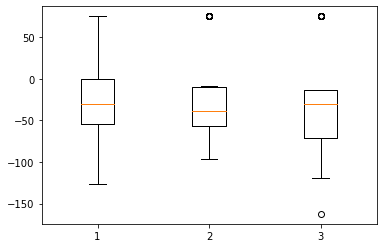

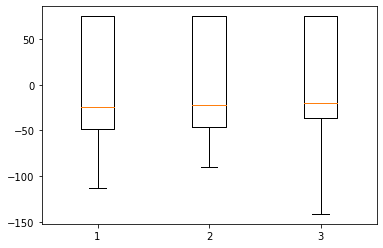

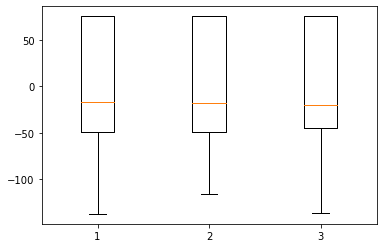

In [65]:
for i in range(3):
    plt.boxplot(d.logprob_test[i])
    plt.show()

In [66]:
d.estimate_mean()

logprob_test_mean: [[-14.80386293 -17.229896   -23.26792445]
 [  1.36224581   2.07290289   5.92234118]
 [ -3.40224967  -1.4597293    0.03724402]]
errrate_test_mean: [[0.29385192 0.29034628 0.2911458 ]
 [0.2867879  0.28629382 0.28954381]
 [0.28595339 0.28462921 0.28632611]]


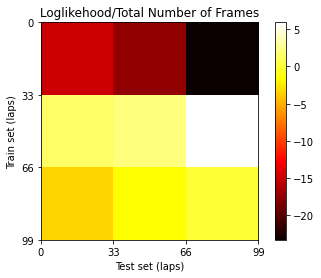

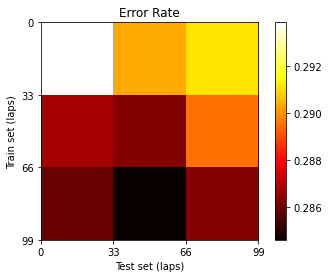

In [67]:
logprob_test_mean = d.logprob_test_mean
errrate_test_mean = d.errrate_test_mean

plt.imshow(logprob_test_mean, cmap='hot')
plt.xlabel('Test set (laps)')
plt.ylabel('Train set (laps)')
plt.xticks(np.arange(d.n_chunks+1)-0.5,np.arange(d.n_chunks+1)*d.n_laps_perchunk)
plt.yticks(np.arange(d.n_chunks+1)-0.5,np.arange(d.n_chunks+1)*d.n_laps_perchunk)
plt.title('Loglikehood/Total Number of Frames')
plt.colorbar()
plt.show()

plt.imshow(errrate_test_mean, cmap='hot')
plt.xlabel('Test set (laps)')
plt.ylabel('Train set (laps)')
plt.xticks(np.arange(d.n_chunks+1)-0.5,np.arange(d.n_chunks+1)*d.n_laps_perchunk)
plt.yticks(np.arange(d.n_chunks+1)-0.5,np.arange(d.n_chunks+1)*d.n_laps_perchunk)
plt.title('Error Rate')
plt.colorbar()
plt.show()

In [23]:
from scipy.stats import norm, poisson

In [25]:
poisson.rvs(mu=5,size=(10))

array([3, 6, 4, 5, 4, 7, 8, 5, 8, 3])

In [30]:
np.vstack((poisson.rvs(mu=5,size=(10)),poisson.rvs(mu=200,size=(10))))

array([[  1,   3,   6,   4,   5,   4,   7,   4,   9,   4],
       [198, 182, 196, 172, 189, 178, 192, 205, 199, 210]])

In [39]:
poisson.pmf(np.vstack((poisson.rvs(mu=5,size=(10)),poisson.rvs(mu=200,size=(10)))).T,mu=np.array([10,10]))

array([[1.89166374e-002, 8.93677923e-175],
       [9.00792257e-002, 1.41781352e-182],
       [1.12599032e-001, 1.68414993e-164],
       [1.13736396e-001, 9.59078709e-196],
       [1.89166374e-002, 6.62633582e-171],
       [1.89166374e-002, 4.53643616e-176],
       [2.26999649e-003, 4.53073501e-201],
       [3.78332748e-002, 1.15132129e-178],
       [1.89166374e-002, 2.45545500e-168],
       [1.89166374e-002, 2.03324686e-194]])

In [33]:
norm.rvs(loc=10,scale=1,size=10)

array([ 9.54820082, 10.86300115,  9.62894367, 10.6220703 ,  9.19704657,
        9.44731177,  9.64750574, 10.94864555, 11.54238595, 11.17083748])

In [36]:
norm.pdf(np.vstack((norm.rvs(loc=10,scale=1,size=10),norm.rvs(loc=20,scale=2,size=10))).T,loc=np.array([10,20]),scale=np.array([1,2]))

array([[0.39530158, 0.19743223],
       [0.10042295, 0.08317588],
       [0.25861   , 0.17966671],
       [0.39852269, 0.16075404],
       [0.20368203, 0.19184887],
       [0.28636946, 0.19928263],
       [0.39842902, 0.15894571],
       [0.3817422 , 0.07234129],
       [0.22979059, 0.18309068],
       [0.32406006, 0.12659774]])

In [37]:
np.vstack((norm.rvs(loc=10,scale=1,size=10),norm.rvs(loc=20,scale=2,size=10))).T

array([[ 8.77667138, 20.57639786],
       [10.62217528, 20.716593  ],
       [10.80611556, 19.69464095],
       [ 9.43260179, 18.48356058],
       [ 8.5394832 , 18.09955518],
       [11.06764272, 20.68837065],
       [ 7.49238673, 15.47070523],
       [12.48532296, 16.08671032],
       [11.80027659, 19.84456246],
       [ 9.31921135, 19.34210781]])

In [68]:
train_lap, train_lap_len, train_idx = d.separate_chunk_set()

In [74]:
d0 = np.unique(d.Distance0)
dbins = d0.shape[0]
Trace_train = d.Trace0[train_idx[0][0],:]
Distance_train = d.Distance0[train_idx[0][0]]
mean_cal, std_cal, not_once, once = hcv.EstimateModelParam(Trace_train, Distance_train, d0, dbins)

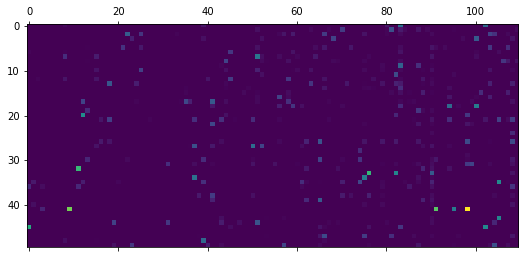

In [75]:
plt.matshow(mean_cal)

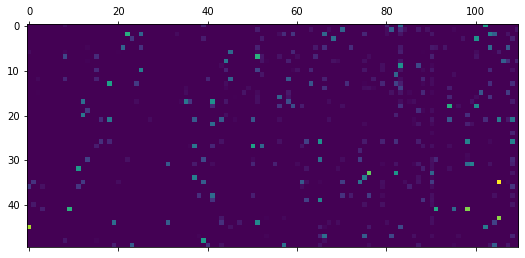

In [76]:
plt.matshow(std_cal)